In [49]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv('data/Train.csv')


In [51]:
df.head(3)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0


In [81]:
print("payment_mode: ", df.payment_mode.value_counts())
print("payment_mode: ", df.payment_mode.value_counts())
print("most_impressing: ", df.most_impressing.value_counts())
print("info_source", df.info_source.value_counts())

payment_mode:  Cash                 4172
Credit Card           622
Other                   8
Travellers Cheque       7
Name: payment_mode, dtype: int64
payment_mode:  Cash                 4172
Credit Card           622
Other                   8
Travellers Cheque       7
Name: payment_mode, dtype: int64
most_impressing:  Friendly People                         1541
 Wildlife                               1038
No comments                              743
Wonderful Country, Landscape, Nature     507
Good service                             365
Excellent Experience                     271
Satisfies and Hope Come Back              31
Name: most_impressing, dtype: int64
info_source Travel, agent, tour operator      1913
Friends, relatives                1635
others                             490
Newspaper, magazines,brochures     359
Radio, TV, Web                     249
Trade fair                          77
Tanzania Mission Abroad             68
inflight magazines                  18
Nam

In [53]:
# display the most common values
for col in ["travel_with", "most_impressing"]:
    print(col)
    print(df[col].value_counts(normalize = True).sort_values(ascending = False).head(2))

travel_with
Alone     0.342355
Spouse    0.271989
Name: travel_with, dtype: float64
most_impressing
Friendly People    0.342749
 Wildlife          0.230872
Name: most_impressing, dtype: float64


The output above shows that 
- 'Alone' and 'Spouse' are the most common values in 'travel_with'
- 'Friendly People' and 'Wildlife' are the most common values in 'most_impressing'

## Categorical Data

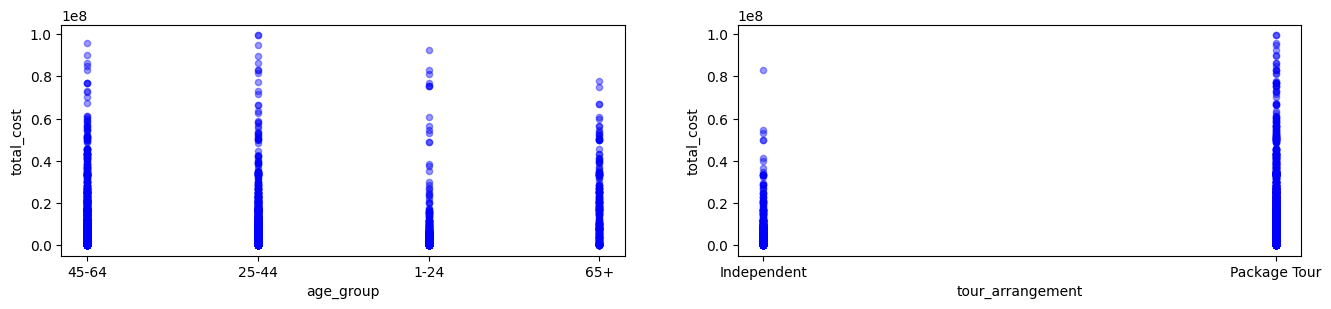

In [54]:
# Create plots to identify categorical features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['age_group', 'tour_arrangement'], axes):
    df.plot(kind='scatter', x=xcol, y='total_cost', ax=ax, alpha=0.4, color='b')

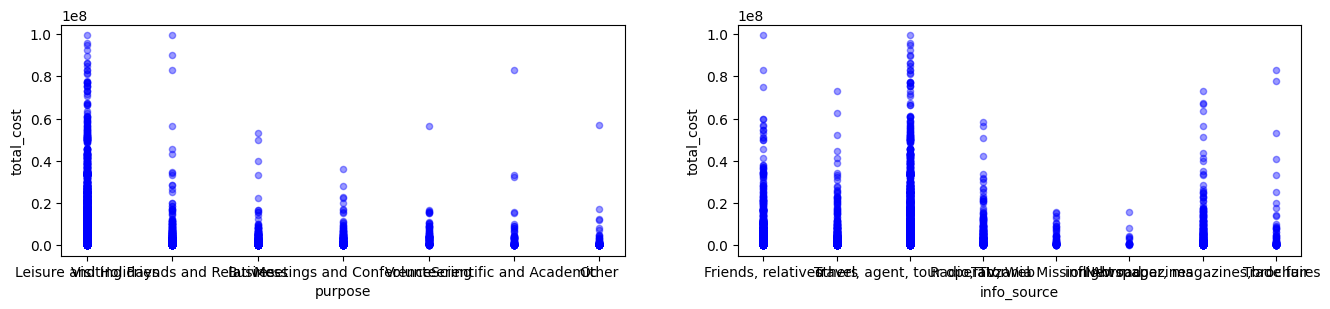

In [55]:
# Create plots to identify categorical features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['purpose', 'info_source'], axes):
    df.plot(kind='scatter', x=xcol, y='total_cost', ax=ax, alpha=0.4, color='b')

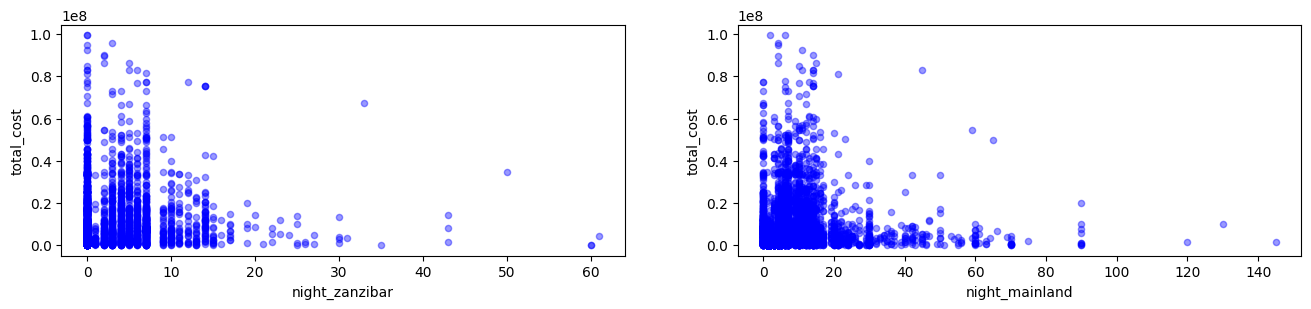

In [56]:
# Create plots to identify categorical features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['night_zanzibar', 'night_mainland'], axes):
    df.plot(kind='scatter', x=xcol, y='total_cost', ax=ax, alpha=0.4, color='b')

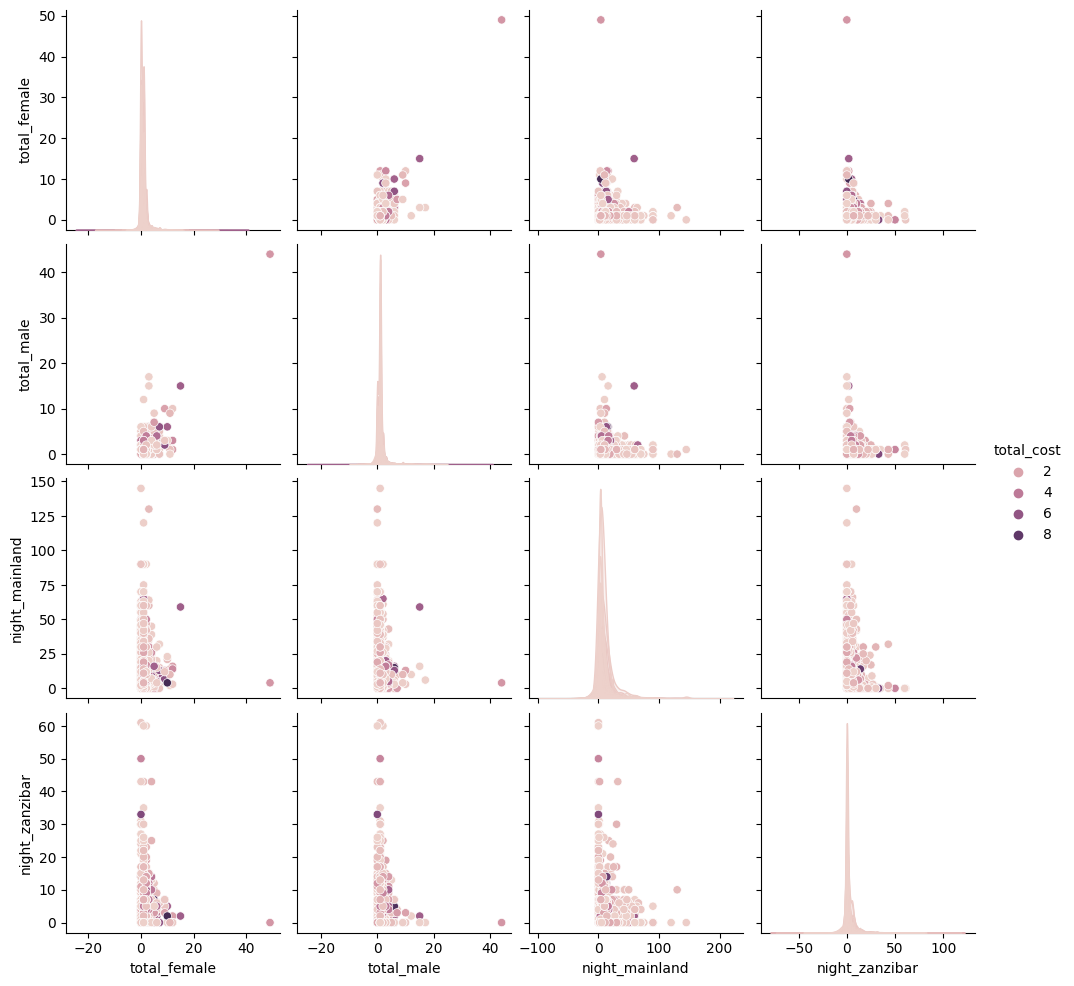

In [77]:
sns.pairplot(df,hue='total_cost')

In [78]:
df.corr()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
total_female,1.000000,0.471180,0.031200,0.138555,0.286097
total_male,0.471180,1.000000,-0.041964,0.050318,0.185848
night_mainland,0.031200,-0.041964,1.000000,-0.118155,0.020473
night_zanzibar,0.138555,0.050318,-0.118155,1.000000,0.145139
total_cost,0.286097,0.185848,0.020473,0.145139,1.000000


<AxesSubplot:>

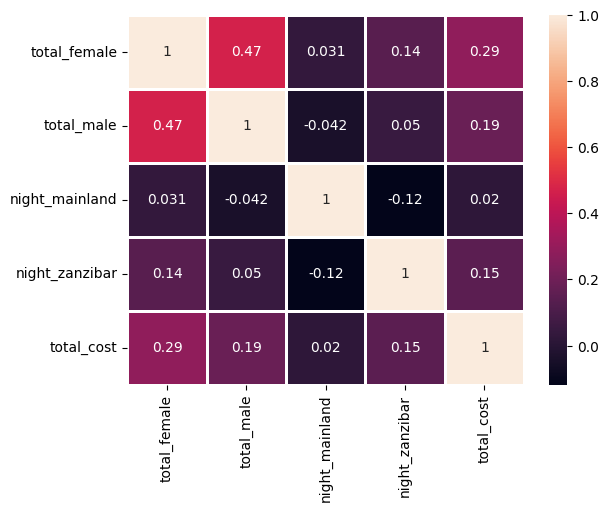

In [79]:
sns.heatmap(df.corr(),annot=True,lw=1)

In [57]:
df_country = df.groupby(['country'])['total_cost'].sum().rename("total_cost_by_country")
df_country= df_country.to_frame().reset_index()
df_country['country'].replace(['UNITED STATES OF AMERICA'], 'USA')
df_country.head(10)


,country,total_cost_by_country
0,ALGERIA,4.563098e+06
1,ANGOLA,5.000000e+05
2,ARGENTINA,1.044225e+07
3,AUSTRALIA,2.743132e+09
4,AUSTRIA,1.375216e+08
5,BELGIUM,4.241859e+08
6,BERMUDA,2.000000e+05
7,BRAZIL,7.814373e+07
8,BURGARIA,9.584475e+05
9,BURUNDI,5.216403e+07


In [58]:
#top 12 countires we get for our new_cleaned data. 

df_country_sort= df_country.sort_values(['total_cost_by_country'],ascending=False).head(15)
df_country_sort

,country,total_cost_by_country
100,UNITED STATES OF AMERICA,8.890832e+09
99,UNITED KINGDOM,3.808383e+09
41,ITALY,3.762160e+09
29,FRANCE,3.344496e+09
3,AUSTRALIA,2.743132e+09
83,SOUTH AFRICA,2.594805e+09
31,GERMANY,2.218352e+09
84,SPAIN,1.699099e+09
10,CANADA,1.462029e+09
64,NETHERLANDS,1.250217e+09


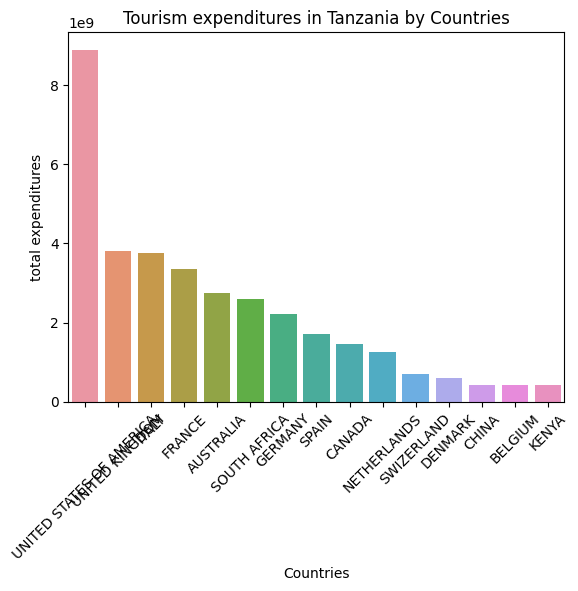

In [59]:
sns.barplot(x='country', y='total_cost_by_country', data=df_country_sort)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("Countries")
plt.title("Tourism expenditures in Tanzania by Countries")
plt.show()

In [60]:
#we analzye here people with package tour spend more money then people who go independetly

df_country_arrangment = df.groupby(['tour_arrangement'])['total_cost'].sum().rename("total_cost_by_country")
df_country_arrangment= df_country_arrangment.to_frame().reset_index()

df_country_arrangment.head(10)


,tour_arrangement,total_cost_by_country
0,Independent,7.094906e+09
1,Package Tour,3.192719e+10


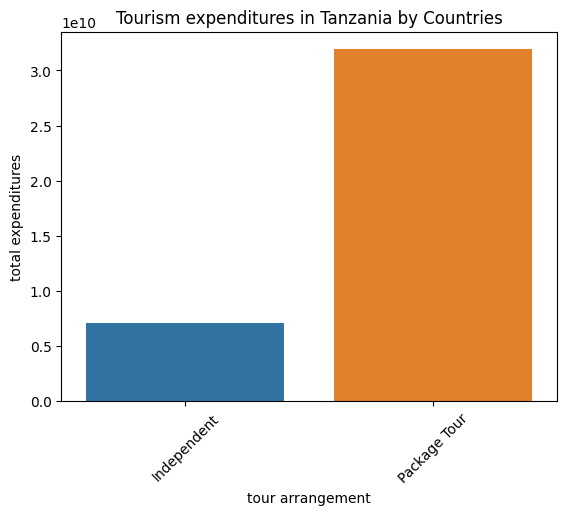

In [61]:
sns.barplot(x='tour_arrangement', y='total_cost_by_country', data=df_country_arrangment)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("tour arrangement")
plt.title("Tourism expenditures in Tanzania by Countries")
plt.show()

In [62]:
df_country = df.groupby(['travel_with'])['total_cost'].sum().rename("travel_cost_by_travel_with")
df_country= df_country.to_frame().reset_index()

df_country.head(10)

,travel_with,travel_cost_by_travel_with
0,Alone,4.334079e+09
1,Children,1.653502e+09
2,Friends/Relatives,9.158700e+09
3,Spouse,1.274631e+10
4,Spouse and Children,6.745753e+09


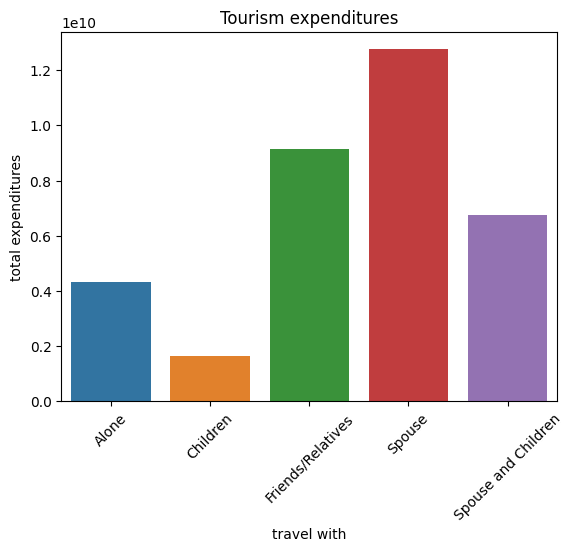

In [63]:
sns.barplot(x='travel_with', y='travel_cost_by_travel_with', data=df_country)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("travel with")
plt.title("Tourism expenditures")
plt.show()

In [64]:
print("package_transport_int: ", df.package_transport_int.value_counts())
print("package_transport_tz: ", df.package_transport_tz.value_counts())
print("package_accomodation: ", df.package_accomodation.value_counts())
print("package_food: ", df.package_food.value_counts())
print("package_sightseeing: ", df.package_sightseeing.value_counts())
print("package_guided_tour: ", df.package_guided_tour.value_counts())
print("package_insurance: ", df.package_insurance.value_counts())

package_transport_int:  No     3357
Yes    1452
Name: package_transport_int, dtype: int64
package_transport_tz:  No     2919
Yes    1890
Name: package_transport_tz, dtype: int64
package_accomodation:  No     2602
Yes    2207
Name: package_accomodation, dtype: int64
package_food:  No     2748
Yes    2061
Name: package_food, dtype: int64
package_sightseeing:  No     3319
Yes    1490
Name: package_sightseeing, dtype: int64
package_guided_tour:  No     3259
Yes    1550
Name: package_guided_tour, dtype: int64
package_insurance:  No     4079
Yes     730
Name: package_insurance, dtype: int64


In [65]:
df_package_insurance= df.groupby(['package_insurance'])['total_cost'].sum().rename("total_cost_by_insurance")
df_package_insurance= df_package_insurance.to_frame().reset_index()

df_package_insurance

,package_insurance,total_cost_by_insurance
0,No,2.734661e+10
1,Yes,1.167549e+10


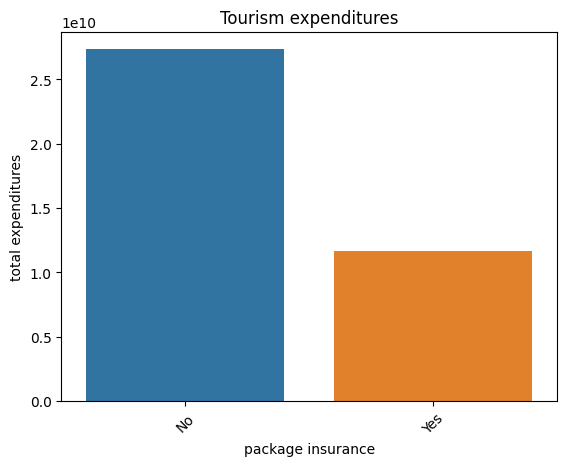

In [66]:
sns.barplot(x='package_insurance', y='total_cost_by_insurance', data=df_package_insurance)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("package insurance")
plt.title("Tourism expenditures")
plt.show()

In [67]:
df_package_trans= df.groupby(['package_transport_tz'])['total_cost'].sum().rename("total_cost_by_trans")
df_package_trans= df_package_trans.to_frame().reset_index()

df_package_trans

,package_transport_tz,total_cost_by_trans
0,No,1.121451e+10
1,Yes,2.780758e+10


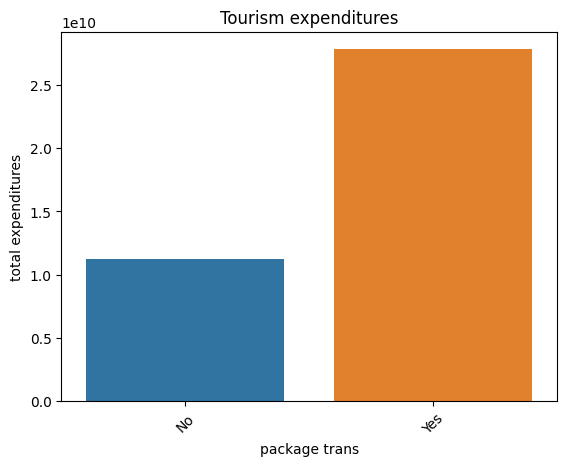

In [68]:
sns.barplot(x='package_transport_tz', y='total_cost_by_trans', data=df_package_trans)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("package trans")
plt.title("Tourism expenditures")
plt.show()

In [69]:
df_package_sightseeing= df.groupby(['package_sightseeing'])['total_cost'].sum().rename("total_cost_by_sightseeing")
df_package_sightseeing= df_package_sightseeing.to_frame().reset_index()

df_package_sightseeing

,package_sightseeing,total_cost_by_sightseeing
0,No,1.622003e+10
1,Yes,2.280206e+10


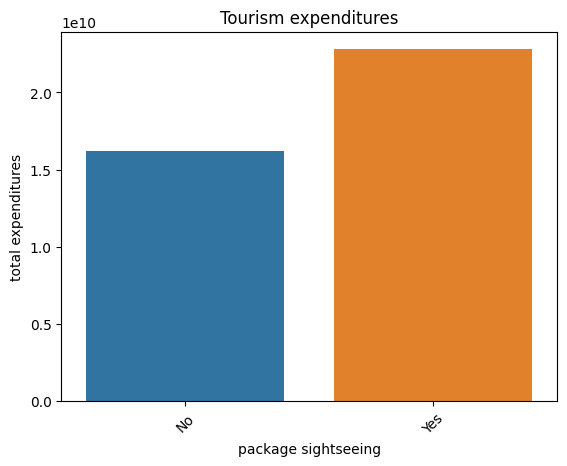

In [70]:
sns.barplot(x='package_sightseeing', y='total_cost_by_sightseeing', data=df_package_sightseeing)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("package sightseeing")
plt.title("Tourism expenditures")
plt.show()

In [71]:
df_package_guided= df.groupby(['package_guided_tour'])['total_cost'].sum().rename("total_cost_by_guided")
df_package_guided= df_package_guided.to_frame().reset_index()

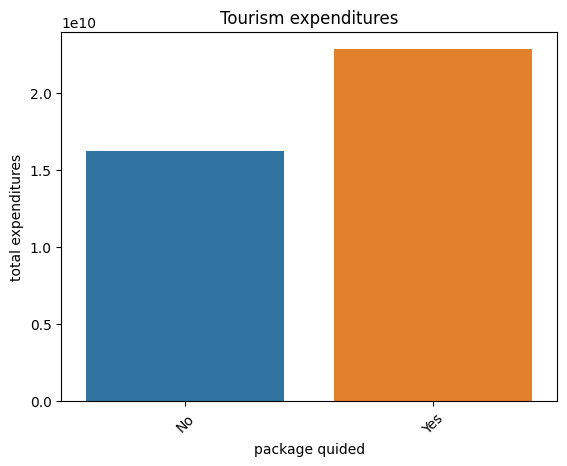

In [72]:
sns.barplot(x='package_guided_tour', y='total_cost_by_guided', data=df_package_guided)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("package quided")
plt.title("Tourism expenditures")
plt.show()

In [75]:
df_age= df.groupby(['age_group'])['total_cost'].sum().rename("total_cost_by_age")
df_age= df_age.to_frame().reset_index()

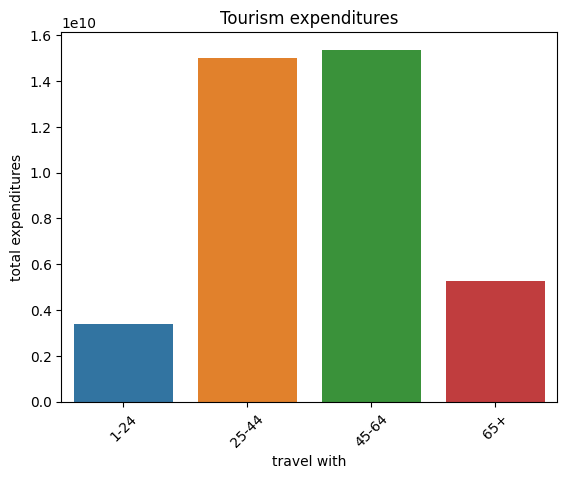

In [76]:
sns.barplot(x='age_group', y='total_cost_by_age', data=df_age)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("travel with")
plt.title("Tourism expenditures")
plt.show()

In [ ]:
df_package_by_age= df.groupby(['age_group'])['package_insurance'].count().rename("count of insurance")
df_package_by_age= df_package_by_age.to_frame().reset_index()
df_package_by_age

,age_group,count of insurance
0,1-24,413
1,25-44,1729
2,45-64,1059
3,65+,259


In [ ]:
#people who travel alone very like to buy insurance

df_package_by_travel_with= df.groupby(['travel_with'])['package_insurance'].count().rename("count of insurance")
df_package_by_travel_with= df_package_by_travel_with.to_frame().reset_index()
df_package_by_travel_with

,travel_with,count of insurance
0,Alone,1139
1,Children,152
2,Friends/Relatives,844
3,Spouse,968
4,Spouse and Children,357


In [ ]:
df_package_by_most_impressing= df.groupby(['most_impressing','first_trip_tz'])['first_trip_tz'].count().rename("count of trip tz")
df_package_by_most_impressing= df_package_by_most_impressing.to_frame().reset_index()
df_package_by_most_impressing

,most_impressing,first_trip_tz,count of trip tz
0,Wildlife,No,206
1,Wildlife,Yes,832
2,Excellent Experience,No,87
3,Excellent Experience,Yes,184
4,Friendly People,No,554
5,Friendly People,Yes,987
6,Good service,No,109
7,Good service,Yes,256
8,No comments,No,314
9,No comments,Yes,429


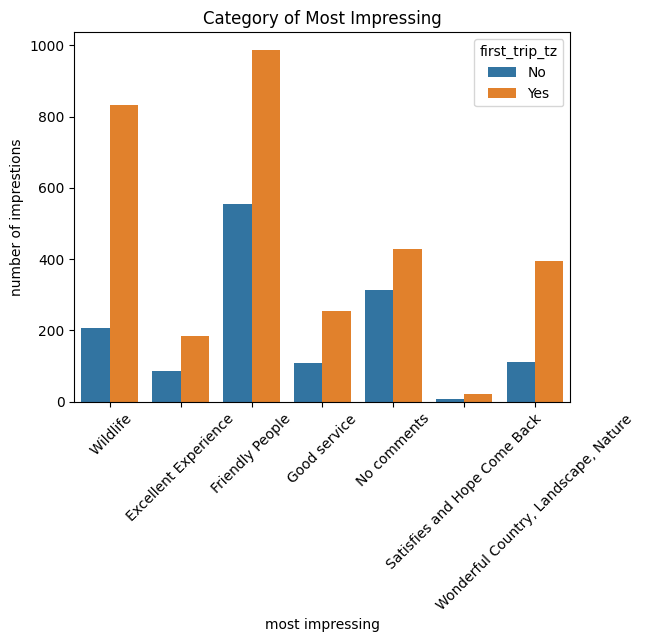

In [ ]:
#people who left feed back as "Friendly people" are highly like to come back to Tanzania


sns.barplot(x='most_impressing', y='count of trip tz', data=df_package_by_most_impressing,hue = 'first_trip_tz')

plt.xticks(rotation=45)
plt.ylabel("number of imprestions")
plt.xlabel("most impressing")
plt.title("Category of Most Impressing")
plt.show()

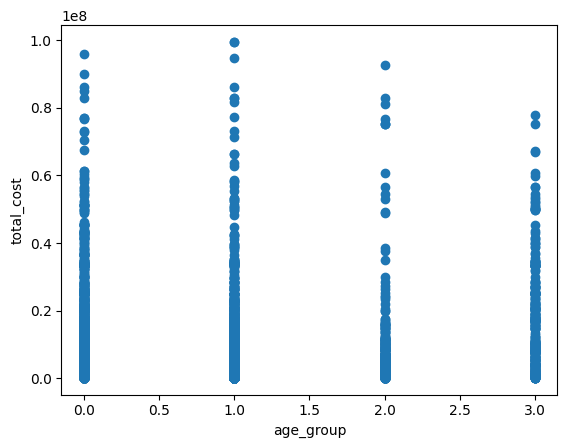

In [ ]:
plt.scatter(df.age_group, df.total_cost)
plt.ylabel('total_cost')
plt.xlabel('age_group');

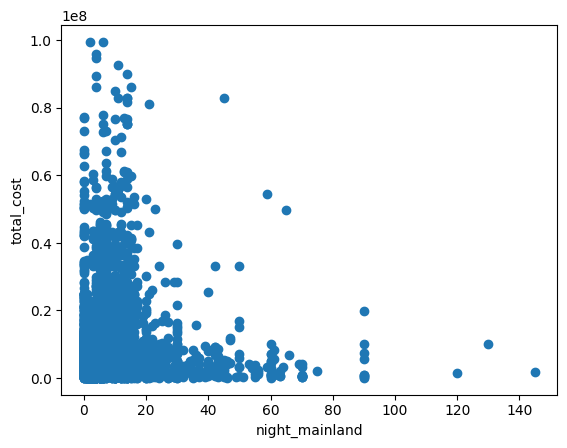

In [74]:
#we have outliers that isw we created a new data set to remove the outliers. 

plt.scatter(df['night_mainland'], df['total_cost'])
plt.xlabel("night_mainland")
plt.ylabel("total_cost");

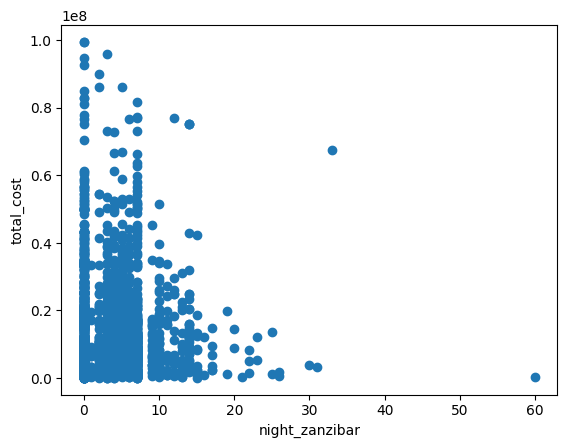

In [ ]:
#we have outliers that isw we created a new data set to remove the outliers.

plt.scatter(df['night_zanzibar'], df['total_cost'])
plt.xlabel("night_zanzibar")
plt.ylabel("total_cost");

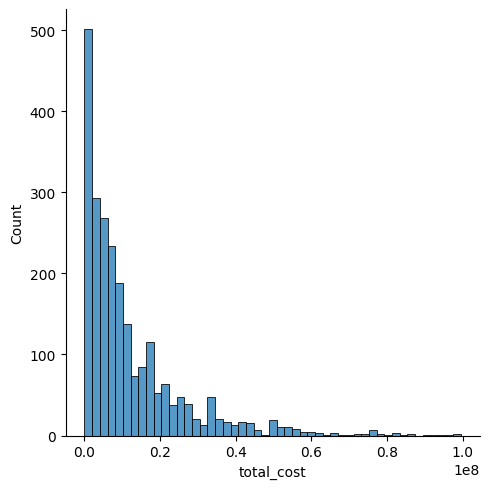

In [ ]:
#we have outliers that isw we created a new data set to remove the outliers.
sns.displot(df, x="total_cost")

In [ ]:
# we cleaned the data in the part of data cleaning.we created a separate csv file. Lets fist load the new csv file.

new_cleaned2 =pd.read_csv('new_cleaned.csv')

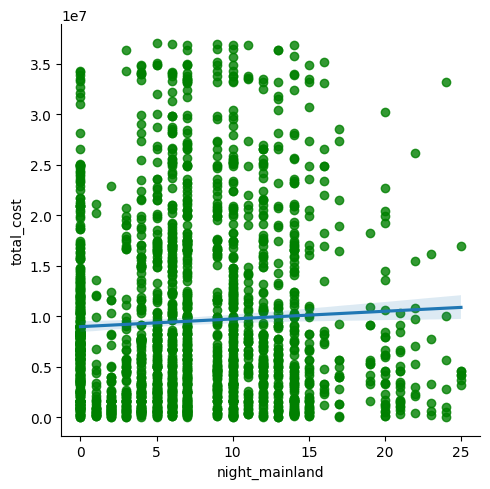

In [ ]:
#now we have much better disrubited graphs.

sns.lmplot(x ='night_mainland', y ='total_cost', data = new_cleaned2,scatter_kws ={'color':'green'})

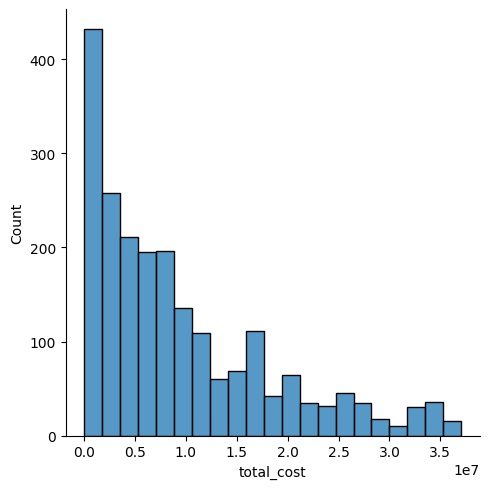

In [ ]:

sns.displot(new_cleaned2, x="total_cost")

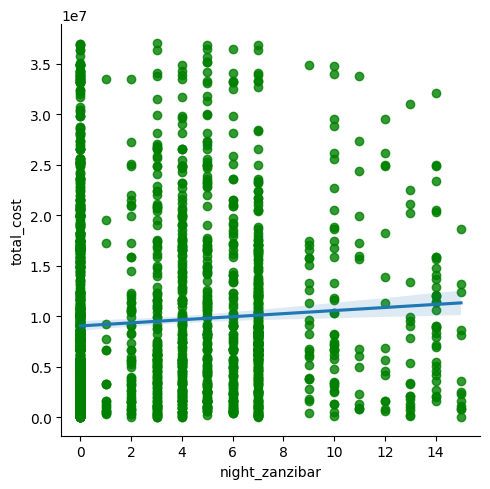

In [ ]:
sns.lmplot(x ='night_zanzibar', y ='total_cost', data = new_cleaned2,scatter_kws ={'color':'green'})